In [21]:
# import libraries and modules that are requird for the assignment
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from stepwise_regression import step_reg
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


### 4.1

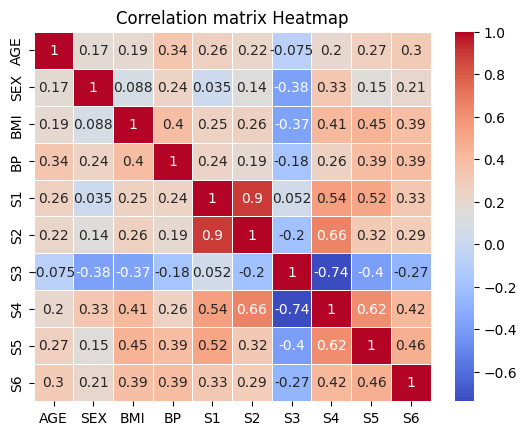

In [22]:
# read the data 
diabetes_data = pd.read_excel('Diabetes_Data.xlsx')
explanatory_variables=diabetes_data[['AGE','SEX','BMI','BP','S1','S2','S3', 'S4','S5','S6']] # predictor variables
correlation_matrix=explanatory_variables.corr() # find the correlation coefficient between variables
sns.heatmap(correlation_matrix,annot=True, cmap="coolwarm", linewidths=0.5) # use heat map to represent the correlation values by using color scales.
plt.title("Correlation matrix Heatmap")
plt.show()

### 3.2 find the answer in the report

### 3.3 multivariate linear model

In [ ]:
# let us use backward linear regression to find the model
# dependent variable y
# independent variables: 10 variables ['AGE','SEX','BMI','BP','S1','S2','S3', 'S4','S5','S6']
# we are going to use backward elimination stepwise linear regression
# step 1: get independent and dependent variables
X=explanatory_variables   # independent variables
y=diabetes_data["Y"] # dependent variable

#step 2: fit the full model
X=sm.add_constant(X)  # add a constant to the model
model1= sm.OLS(y, X).fit()
   # check the summary of the full model
y_pred1 = model1.predict(X)  # Use 'model' for the full model
mse1 = mean_squared_error(y, y_pred1)
r2 = r2_score(y, y_pred1)
print("mean squared error: ", mse1)
print("coefficient of determination:",r2)
print("_"*100)
print(model1.summary()) 





mean squared error:  2859.6963475867506
coefficient of determination: 0.5177484222203498
____________________________________________________________________________________________________
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           3.83e-62
Time:                        23:09:18   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coe

In [24]:
Adjusted_R_squared= model1.rsquared_adj
print("the adjsuted correlation coefficient is", round(Adjusted_R_squared, 3))

the adjsuted correlation coefficient is 0.507


### question: could there be a problem of collinearity?

the following are the conditions for collinearity to occur in a dataset:
we use VIF , Variance inflation factor:
VIF starts at 1 and has no upper limit
VIF = 1, no correlation between the independent variable and the other variables
VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the

according to the VIF calculated above, all variables have variance inflation factor which is above 10,this indicates that there is a fatal multicollinearity problem

In [26]:
var_pvalues = model1.pvalues
significant_var = []

# Iterate through variable names and their corresponding p-values
for var_name, p_value in var_pvalues.items():
    if p_value <= 0.05:
        significant_var.append(var_name)

print("The significant variables are:", significant_var[1:])







The significant variables are: ['SEX', 'BMI', 'BP', 'S5']


### 3.5 

In [27]:
# forward selection
x=explanatory_variables
y=diabetes_data["Y"]
selected_forward=step_reg.forward_regression(X,y, 0.05, verbose=False)
print("selected features: ", selected_forward[1:])

selected features:  ['BMI', 'S5', 'BP', 'S1', 'SEX', 'S2']


In [28]:
# let's check also for backward elimination
x=explanatory_variables
y=diabetes_data["Y"]
selected_backward=step_reg.backward_regression(X,y, 0.05, verbose=False)
print("selected features: ", selected_forward[1:])

selected features:  ['BMI', 'S5', 'BP', 'S1', 'SEX', 'S2']


In [29]:
# build the model, train it and find mean squared error and coefficient of determination
x=diabetes_data[selected_forward[1:]]
x=sm.add_constant(x)
model2=sm.OLS(y, x).fit()
y_pred2= model2.predict(x)
mse2=mean_squared_error(y, y_pred2)
R2= r2_score(y, y_pred2)
print("mean squared error (forward selection): ", mse2)
print("coefficient of determination (forward selection):",R2)



mean squared error (forward selection):  2876.683251787016
coefficient of determination (forward selection): 0.5148837959256445


### Question 4

4. 1 check the report

### 4.2 


In [30]:
# read the data
titanic_data=pd.read_csv("titanic3.csv")
nbr_survived= len(titanic_data["survived"].loc[titanic_data["survived"]==1])
prob_survival=nbr_survived/len(titanic_data)
print("the probability of survival in titanic crush was", prob_survival)

the probability of survival in titanic crush was 0.3819709702062643


In [31]:
classes_prob={}
for clas in titanic_data["pclass"].unique():
    pclass= titanic_data.loc[titanic_data["pclass"]==clas]
    survived=pclass.loc[pclass["survived"]==1]
    prob_class=len(survived)/len(pclass)
    classes_prob[clas]=prob_class
prb_class={"passenger_classes": classes_prob.keys(), "survival probability": classes_prob.values()}
df=pd.DataFrame(prb_class)
print(tabulate(df, headers='keys', tablefmt="fancy_grid"))

╒════╤═════════════════════╤════════════════════════╕
│    │   passenger_classes │   survival probability │
╞════╪═════════════════════╪════════════════════════╡
│  0 │                   1 │               0.619195 │
├────┼─────────────────────┼────────────────────────┤
│  1 │                   2 │               0.429603 │
├────┼─────────────────────┼────────────────────────┤
│  2 │                   3 │               0.255289 │
╘════╧═════════════════════╧════════════════════════╛


In [32]:


ages_prob={}
age_bins= [0,18,35,60,90]
bin_labels=["child", "adult", "middle-aged", "old"] 
avg= titanic_data["age"].mean()

titanic_data["age category"]=pd.cut(titanic_data["age"].fillna(avg), bins=age_bins, labels=bin_labels)

for age in titanic_data["age category"].unique():

    age_class= titanic_data.loc[titanic_data["age category"]==age]
    survived= age_class.loc[age_class["survived"]==1]
    prob_class=len(survived)/len(age_class)
    ages_prob[age]=prob_class
prb_ages={"age_classes": ages_prob.keys(), "survival probability": ages_prob.values()}
df=pd.DataFrame(prb_ages)
print(tabulate(df, headers='keys', tablefmt="fancy_grid"))

╒════╤═══════════════╤════════════════════════╕
│    │ age_classes   │   survival probability │
╞════╪═══════════════╪════════════════════════╡
│  0 │ adult         │               0.350126 │
├────┼───────────────┼────────────────────────┤
│  1 │ child         │               0.492228 │
├────┼───────────────┼────────────────────────┤
│  2 │ middle-aged   │               0.411765 │
├────┼───────────────┼────────────────────────┤
│  3 │ old           │               0.242424 │
╘════╧═══════════════╧════════════════════════╛


In [33]:
gender_prob={}
for gender in titanic_data["sex"].unique():
    gender_clas= titanic_data.loc[titanic_data["sex"]==gender]
    survived=gender_clas.loc[gender_clas["survived"]==1]
    prob_gender=len(survived)/len(gender_clas)
    gender_prob[gender]=prob_gender
prb_gender={"passenger_classes": gender_prob.keys(), "survival probability": gender_prob.values()}
df=pd.DataFrame(prb_gender)
print(tabulate(df, headers='keys', tablefmt="fancy_grid"))

╒════╤═════════════════════╤════════════════════════╕
│    │ passenger_classes   │   survival probability │
╞════╪═════════════════════╪════════════════════════╡
│  0 │ female              │               0.727468 │
├────┼─────────────────────┼────────────────────────┤
│  1 │ male                │               0.190985 │
╘════╧═════════════════════╧════════════════════════╛


### 4.4 

In [34]:
titanic_data['sex'] = titanic_data['sex'].replace({'female': 0, 'male': 1})

# Select features and handle missing values
X = titanic_data[['pclass', 'sex', 'age']].fillna(avg)

# Add a constant term (intercept)
X = sm.add_constant(X)

# Define the target variable
y = titanic_data['survived']

# Create and fit the logistic regression model
model = sm.Logit(y, X).fit()
y_pred=(model.predict(X) >= 0.5).astype(int)

# Display the summary of the logistic regression model
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.469029
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                 1309
Model:                          Logit   Df Residuals:                     1305
Method:                           MLE   Df Model:                            3
Date:                Mon, 06 Nov 2023   Pseudo R-squ.:                  0.2947
Time:                        23:09:19   Log-Likelihood:                -613.96
converged:                       True   LL-Null:                       -870.51
Covariance Type:            nonrobust   LLR p-value:                6.892e-111
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3634      0.366     11.936      0.000       3.647       5.080
pclass        -1.0653      0.

In [35]:
y_pred

0       1
1       1
2       1
3       0
4       1
       ..
1304    1
1305    1
1306    0
1307    0
1308    0
Length: 1309, dtype: int32

In [36]:
model.pvalues

const     7.721085e-33
pclass    9.834551e-29
sex       2.747720e-63
age       1.193900e-07
dtype: float64

since the p_values of all variables above is less than 0.05 (the significance level) so we conclude that all the estimates are statistically significant.

###

### 4.5

[[685 124]
 [156 344]]


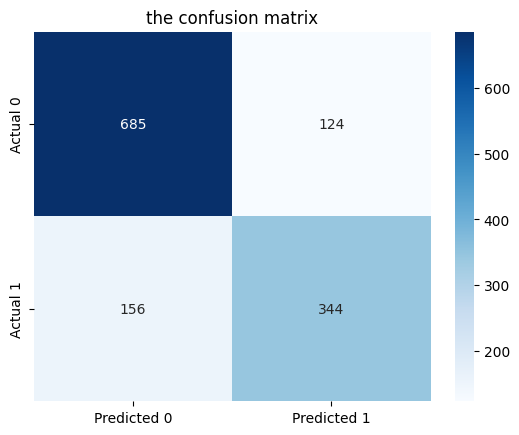

In [37]:
# find the confusion matrix 
conf_matrix= confusion_matrix(y, y_pred)
print(conf_matrix)
accuracy= accuracy_score(y, y_pred)
sns.heatmap(conf_matrix, annot= True, fmt="d", cmap="Blues",xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.title("the confusion matrix")

plt.show()

In [38]:
print(" the Accuracy of the model is:", accuracy)

 the Accuracy of the model is: 0.786096256684492
